In [13]:
import zipfile
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [8]:
a = f'{os.getcwd()}/dataset'
a

'/Users/user/Documents/GitHub/Deep-Learning-TensorFlow/Classifiers/Fashion-MNIST/Data'

In [9]:
zip_path = 'archive.zip'
extracted_path = f'{os.getcwd()}/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
train_csv_path = os.path.join('dataset', 'fashion-mnist_train.csv')
test_csv_path = os.path.join('dataset', 'fashion-mnist_test.csv')

In [41]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [42]:
y_train = train_data['label'].values
X_train = train_data.drop('label', axis=1).values

In [43]:
y_test = test_data['label'].values
X_test = test_data.drop('label', axis=1).values

In [44]:
X_train.shape

(60000, 784)

In [45]:
y_train.shape

(60000,)

In [46]:
X_test.shape

(10000, 784)

In [47]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [48]:
X_test = X_test.reshape(len(X_test), 28*28)

In [49]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


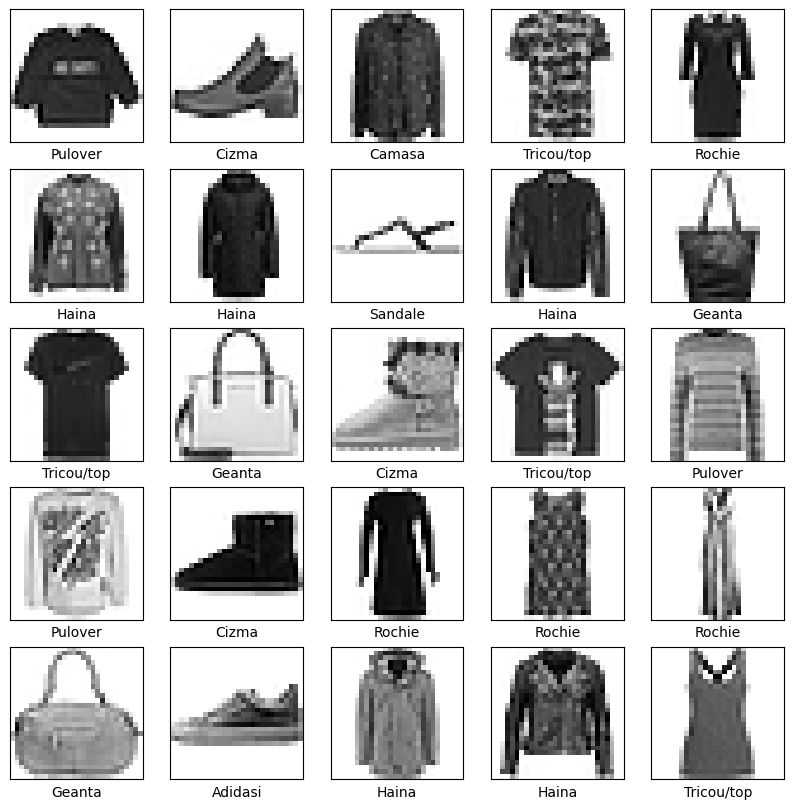

In [50]:
plt.figure(figsize=(10, 10))
class_names = ['Tricou/top', 'Pantaloni', 'Pulover', 'Rochie', 'Haina', 
               'Sandale', 'Camasa', 'Adidasi', 'Geanta', 'Cizma']

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [51]:
X_train.shape

(60000, 784)

In [52]:
X_test.shape

(10000, 784)

In [ ]:
X_train[1]

In [58]:
from tensorflow import keras 
import tensorflow as tf 

In [62]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7759 - loss: 0.6397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.3863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8731 - loss: 0.3472
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8835 - loss: 0.3158
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8905 - loss: 0.2987


In [63]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8820 - loss: 0.3175


[0.30837270617485046, 0.8891000151634216]

In [64]:
import seaborn as sn 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

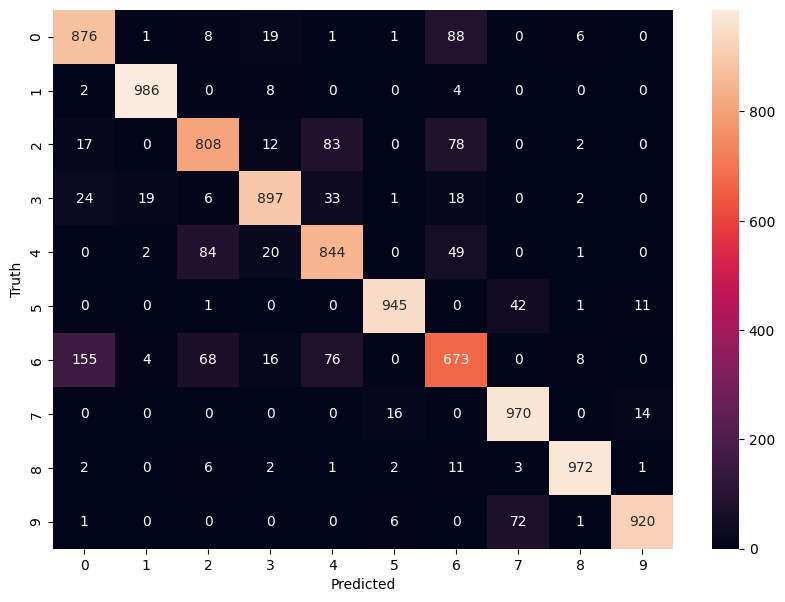

In [65]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### TO DO: Fine Tune the model

- get at least 93% accuracy